<a href="https://colab.research.google.com/github/daniyar-udel/PUS2024_DAbykhanov/blob/main/pus_porject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer

from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import root_mean_squared_error, r2_score, mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
import torch
import torch.nn as nn

# Introduction

The data for this project is Individual Assistance (IA) provided by the Federal Emergency Management Agency (FEMA) to individuals and families who have sustained losses due to disasters. It is intended to meet basic needs and supplement disaster recovery efforts. Homeowners, renters, and business owners in designated counties who sustained damage to their homes, vehicles, personal property, businesses, or inventory resulting from a federally declared disaster may apply for disaster assistance. The Large Disasters dataset contains a curated set of disasters for which individuals applied for Individual Assistance. This dataset only contains some of the largest disasters.

# Problem statement

According to dataset we want to understand how much money will be need in the future to reconstruct houses after different disasters so target variable will be repairAmount. We will work with the features which FEMA was collecting through previous disasters:
 https://www.fema.gov/about/reports-and-data/openfema/IndividualAssistanceHousingRegistrantsLargeDisasters.csv


# Data loading and see bacis information

In [ ]:
city = pd.read_csv('https://www.fema.gov/about/reports-and-data/openfema/IndividualAssistanceHousingRegistrantsLargeDisasters.csv')

In [ ]:
city.head() # see first 5 rows

,disasterNumber,damagedCity,damagedStateAbbreviation,damagedZipCode,householdComposition,grossIncome,specialNeeds,ownRent,residenceType,homeOwnersInsurance,...,rentalAssistanceEndDate,rentalResourceCity,rentalResourceStateAbbreviation,rentalResourceZipCode,primaryResidence,personalPropertyEligible,ppfvl,censusBlockId,id,censusYear
0,4332,HOUSTON,TX,77036.0,1,1800.0,1,Renter,Apartment,0,...,NaN,NaN,NaN,NaN,1.0,0,NaN,4.820143e+14,d214ed1e-951e-484b-b014-2a885a7ea234,2010.0
1,4337,SARASOTA,FL,34238.0,1,NaN,0,Renter,Condo,0,...,NaN,NaN,NaN,NaN,1.0,0,NaN,1.211500e+14,e7b10c4f-adec-4a58-a4fc-85b5a20dfa4c,2010.0
2,4337,KISSIMMEE,FL,34758.0,1,28000.0,0,Renter,House/Duplex,0,...,NaN,NaN,NaN,NaN,1.0,0,0.00,1.209704e+14,0832cc95-c445-4429-956c-e2d1864d37ac,2010.0
3,4339,ARECIBO,PR,612.0,2,2100.0,0,Owner,House/Duplex,0,...,NaN,NaN,NaN,NaN,1.0,0,199.99,7.201330e+14,63bc856a-5cfa-44c8-96e1-f1866735cf94,2010.0
4,4559,SULPHUR,LA,70663.0,4,55000.0,0,Renter,Apartment,0,...,NaN,NaN,NaN,NaN,1.0,0,NaN,2.201900e+14,ce6f1140-3777-41d8-8da0-f7f4891b2228,2020.0


In [ ]:
city.columns # all columns in the data

Index(['disasterNumber', 'damagedCity', 'damagedStateAbbreviation',
       'damagedZipCode', 'householdComposition', 'grossIncome', 'specialNeeds',
       'ownRent', 'residenceType', 'homeOwnersInsurance', 'floodInsurance',
       'inspected', 'rpfvl', 'habitabilityRepairsRequired', 'destroyed',
       'waterLevel', 'highWaterLocation', 'floodDamage', 'foundationDamage',
       'foundationDamageAmount', 'roofDamage', 'roofDamageAmount',
       'tsaEligible', 'tsaCheckedIn', 'rentalAssistanceEligible',
       'rentalAssistanceAmount', 'repairAssistanceEligible', 'repairAmount',
       'replacementAssistanceEligible', 'replacementAmount', 'sbaEligible',
       'renterDamageLevel', 'rentalAssistanceEndDate', 'rentalResourceCity',
       'rentalResourceStateAbbreviation', 'rentalResourceZipCode',
       'primaryResidence', 'personalPropertyEligible', 'ppfvl',
       'censusBlockId', 'id', 'censusYear'],
      dtype='object')

In [ ]:
print(f' Number of rows: {city.shape[0]}')
print(f' Number of columns: {city.shape[1]}') # we have 6367334 rows and 42 columns

 Number of rows: 6367334
 Number of columns: 42


In [ ]:
city.info() # information about column and dtype for that column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6367334 entries, 0 to 6367333
Data columns (total 42 columns):
 #   Column                           Dtype  
---  ------                           -----  
 0   disasterNumber                   int64  
 1   damagedCity                      object 
 2   damagedStateAbbreviation         object 
 3   damagedZipCode                   float64
 4   householdComposition             int64  
 5   grossIncome                      float64
 6   specialNeeds                     int64  
 7   ownRent                          object 
 8   residenceType                    object 
 9   homeOwnersInsurance              int64  
 10  floodInsurance                   int64  
 11  inspected                        int64  
 12  rpfvl                            float64
 13  habitabilityRepairsRequired      float64
 14  destroyed                        int64  
 15  waterLevel                       float64
 16  highWaterLocation                float64
 17  floodDam

# Discriptive statistics

In [ ]:
describe = city.describe(percentiles = [0.025, .05, .1, .25, .5, .75, .9, .95, 0.975]).T
zero_val_cnt = (city == 0).sum()
describe['zero_val %'] = (zero_val_cnt / city.shape[0])*100
describe['missing %'] = 100 - (describe['count'] / city.shape[0])*100
describe.style.format("{:.3f}")

,count,mean,std,min,2.5%,5%,10%,25%,50%,75%,90%,95%,97.5%,max,zero_val %,missing %
disasterNumber,6367334.000,4398.284,108.791,4332.000,4332.000,4332.000,4332.000,4337.000,4337.000,4393.000,4611.000,4611.000,4611.000,4611.000,0.000,0.000
damagedZipCode,6367319.000,42629.335,26935.033,0.000,656.000,692.000,769.000,32460.000,33613.000,70663.000,77386.000,77612.000,78108.000,99999.000,0.004,0.000
householdComposition,6367334.000,2.256,1.458,1.000,1.000,1.000,1.000,1.000,2.000,3.000,4.000,5.000,6.000,99.000,0.000,0.000
grossIncome,5197621.000,59137.306,615993.719,0.000,1344.000,2000.000,5220.000,13000.000,25752.000,48250.000,83000.000,117500.000,155000.000,99999999.000,1.409,18.371
specialNeeds,6367334.000,0.034,0.181,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,96.614,0.000
homeOwnersInsurance,6367334.000,0.299,0.458,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,1.000,1.000,1.000,70.077,0.000
floodInsurance,6367334.000,0.098,0.297,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,1.000,90.217,0.000
inspected,6367334.000,0.489,0.500,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,1.000,1.000,1.000,51.084,0.000
rpfvl,988728.000,4661.791,12193.130,0.000,0.000,26.060,104.280,499.500,1042.400,4444.100,12560.519,18365.794,26000.000,1508279.500,0.553,84.472
habitabilityRepairsRequired,2275825.000,0.384,0.486,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,1.000,1.000,1.000,22.026,64.258


# Repair Amount

In [ ]:
city_repairAmount = city.groupby('censusYear').agg({'repairAmount': 'sum'})
city_repairAmount.columns = ['sum']
city_repairAmount.reset_index(inplace=True)

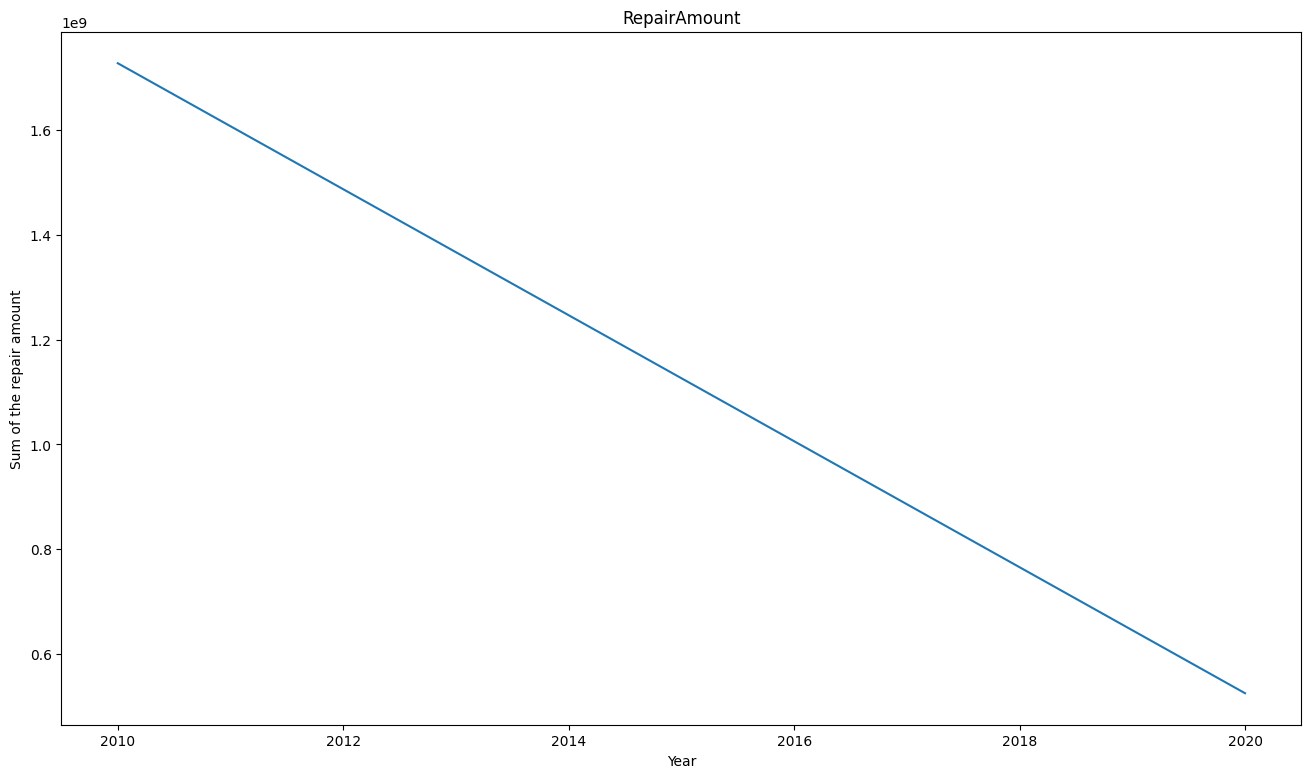

In [ ]:
fig = plt.figure()
fig.set_size_inches(16,9)

sns.lineplot(y=city_repairAmount['sum'], x=city_repairAmount['censusYear'])

plt.title('RepairAmount')
plt.ylabel('Sum of the repair amount')
plt.xlabel('Year')

plt.show()

# Exploratory data analysis and feature engineering

## Delete missing rows by repairAmount

In [ ]:
city['repairAmount'] = city['repairAmount'].replace(['', 'null', None, 'NaN'], np.nan) #if there missing values in columns like null, None or NaN, we will replace on NaN

city.shape # before delete all NaN

(6367334, 42)

In [ ]:
city_cleaned = city.dropna(subset=['repairAmount']) # delete all mising values in column repairAmount
city_cleaned.reset_index(drop=True, inplace=True) # reset index

print(f' Number of rows: {city_cleaned.shape[0]}')
print(f' Number of columns: {city_cleaned.shape[1]}')

 Number of rows: 417745
 Number of columns: 42


## Delete target variable and unique column

In [ ]:
predictors = city_cleaned.columns.tolist() # convert all columns to list

In [ ]:
predictors.remove('repairAmount') # target variable

In [ ]:
predictors.remove('id') # unqiue id doesn't provide any information

In [ ]:
print(f' Number of rows: {city_cleaned[predictors].shape[0]}')
print(f' Number of columns: {city_cleaned[predictors].shape[1]}')

 Number of rows: 417745
 Number of columns: 40


## Delete feautres with number of missing more than 90%

In [ ]:
missing_percentages = city_cleaned[predictors].isnull().sum() / len(city_cleaned[predictors]) * 100 # calculate the percent missing for each column
columns_to_drop = missing_percentages[missing_percentages > 90].index # Identify columns with a missing rate greater than 90%
columns_to_drop = columns_to_drop.tolist() # create list
predictors = [x for x in predictors if x not in columns_to_drop] # delete columns

In [ ]:
print(f' Number of rows: {city_cleaned[predictors].shape[0]}')
print(f' Number of columns: {city_cleaned[predictors].shape[1]}')

 Number of rows: 417745
 Number of columns: 32


## Separate categorical and numerical values

In [ ]:
categorical_col = ['damagedCity', 'damagedStateAbbreviation', 'residenceType', 'ownRent'] # categorical columns
flags = ['householdComposition', 'specialNeeds', 'homeOwnersInsurance', 'floodInsurance',
         'inspected', 'habitabilityRepairsRequired', 'destroyed', 'floodDamage',
         'foundationDamage', 'roofDamage', 'tsaEligible', 'tsaCheckedIn', 'rentalAssistanceEligible',
         'replacementAssistanceEligible', 'sbaEligible', 'primaryResidence', 'personalPropertyEligible', 'censusYear', 'repairAssistanceEligible'
         ] # flag columns (it contrains 0 or 1)
numerical_col = [x for x in predictors if x not in categorical_col and x not in flags] # numerical columns(disasterNumber, damagedZipCode, grossIncome, rpfvl, waterLevel,
# +roofDamageAmount, rentalAssistanceAmount, ppfvl, censusBlockId)

## Let's work with numerical data

<Figure size 1600x900 with 0 Axes>

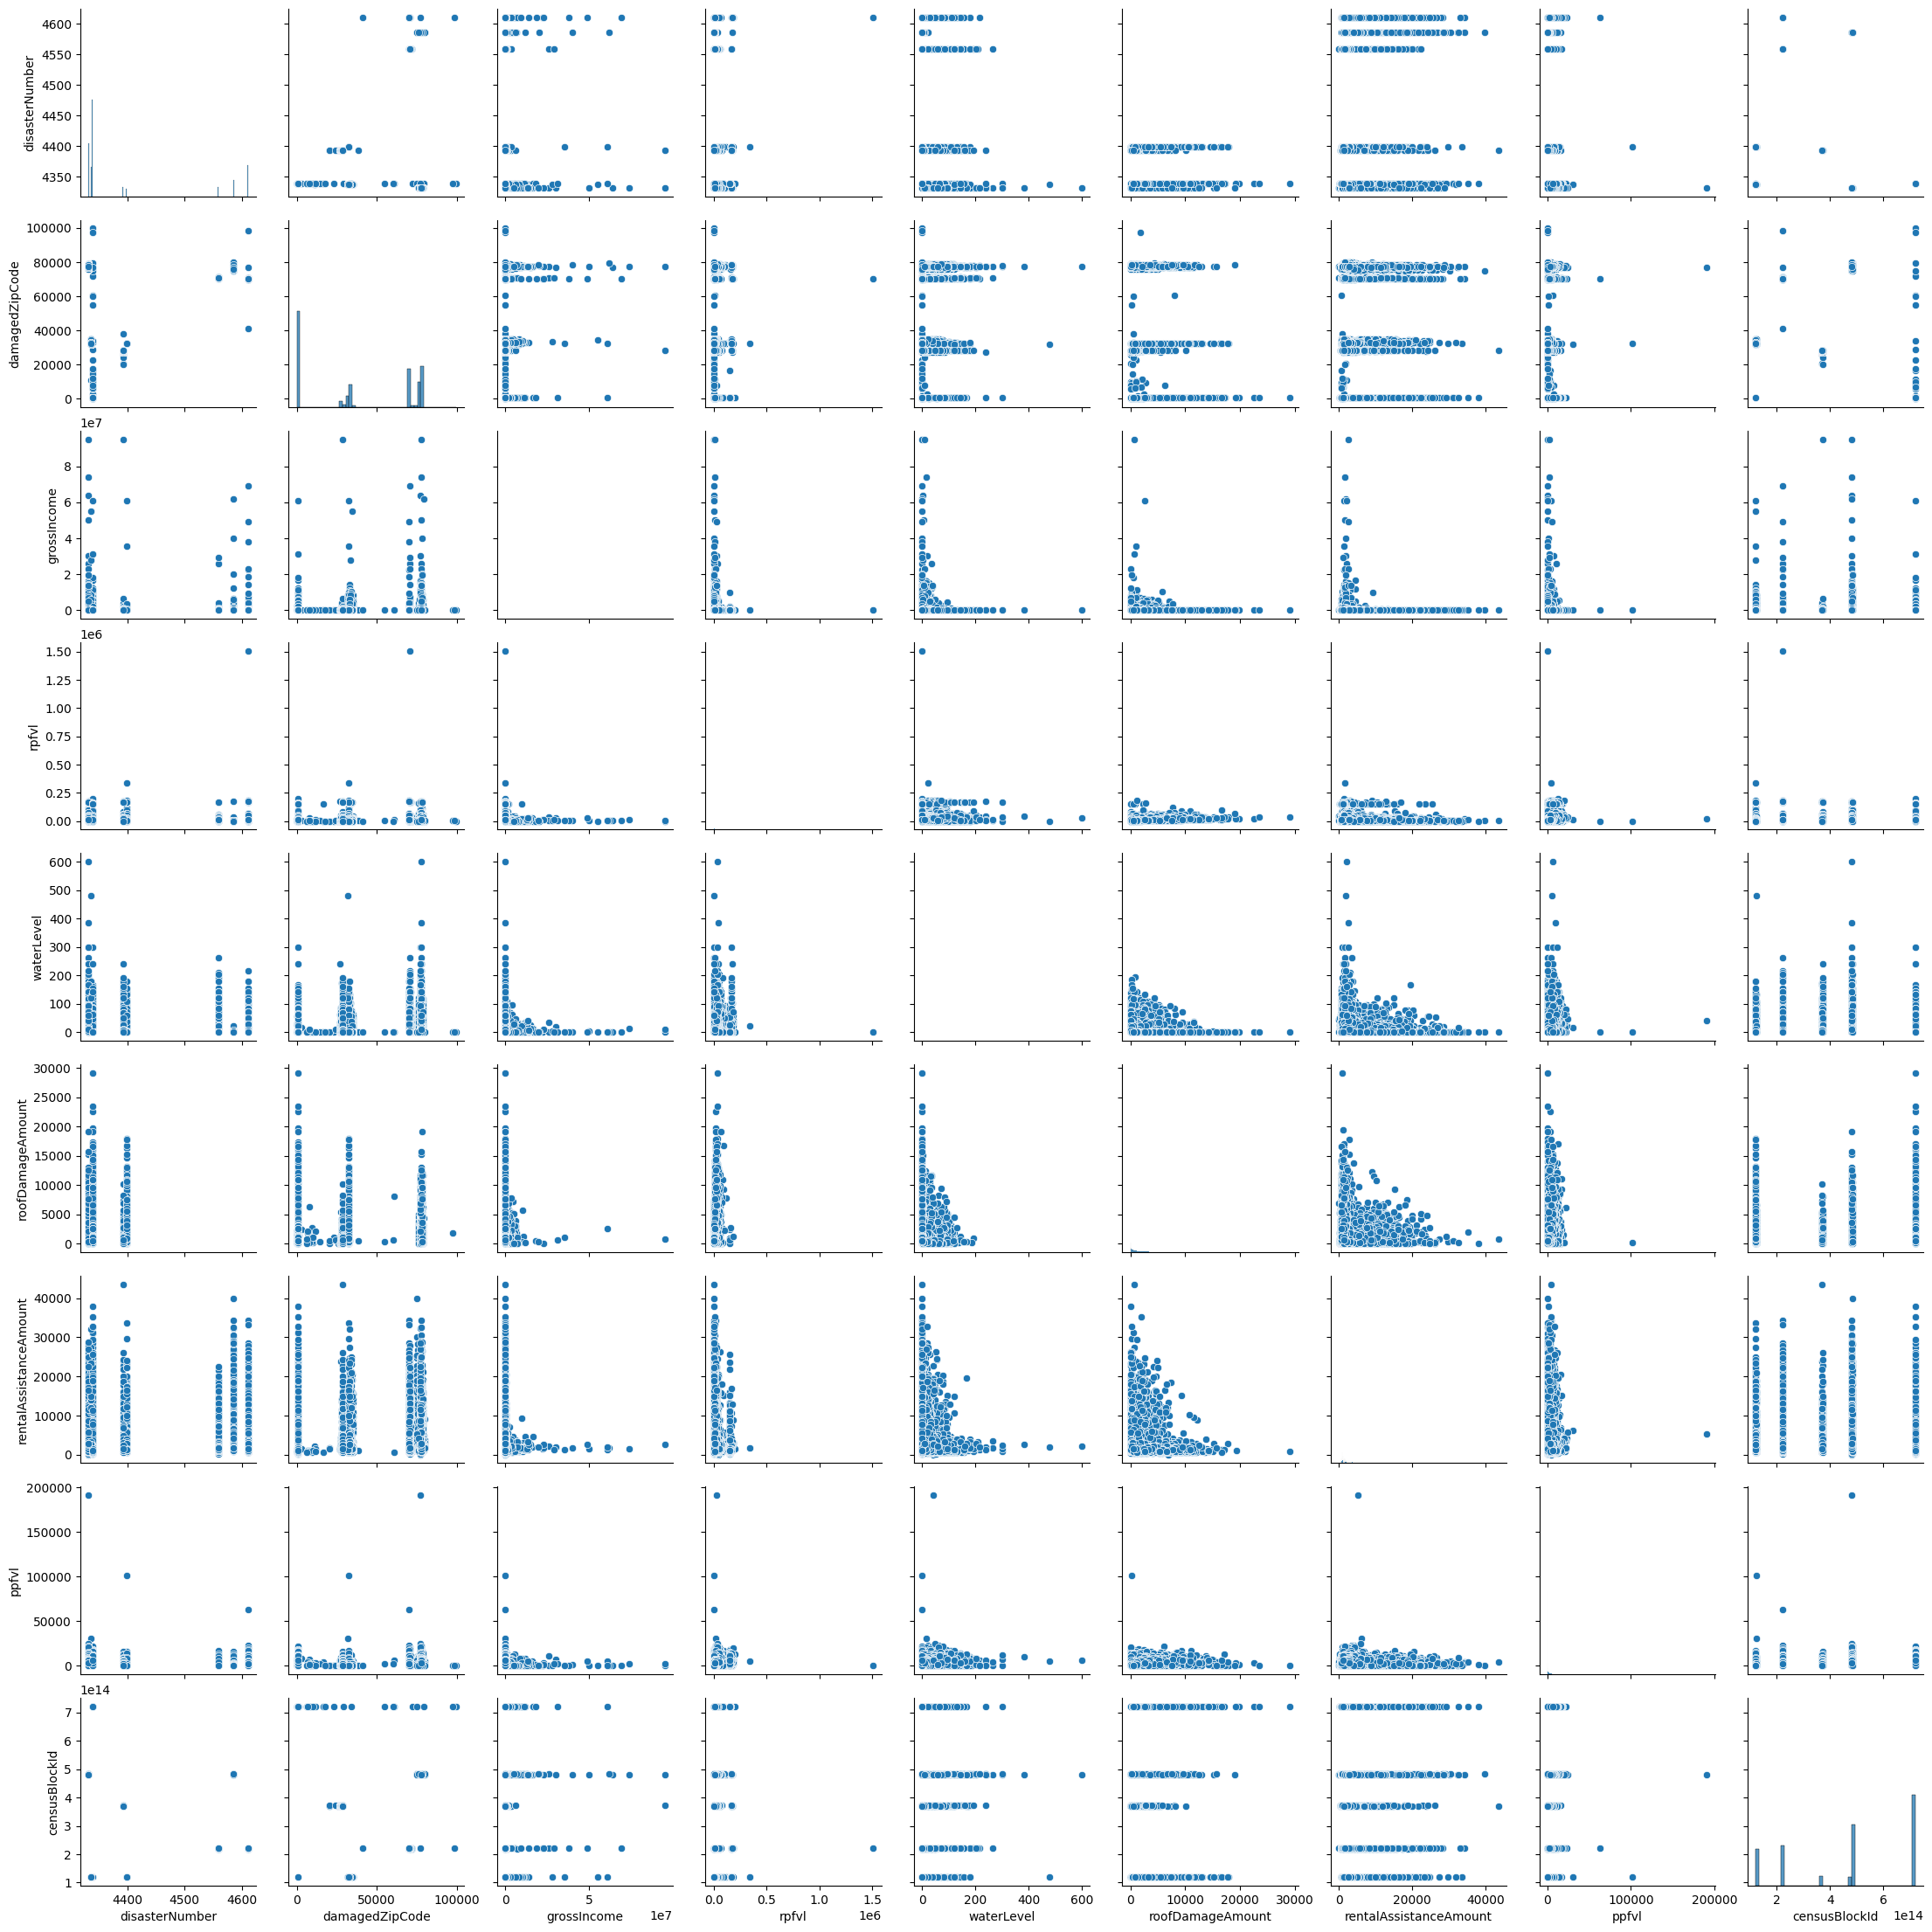

In [ ]:
fig = plt.figure() # create figure
fig.set_size_inches(16,9) # set size

sns.pairplot(city_cleaned[numerical_col])

<Axes: >

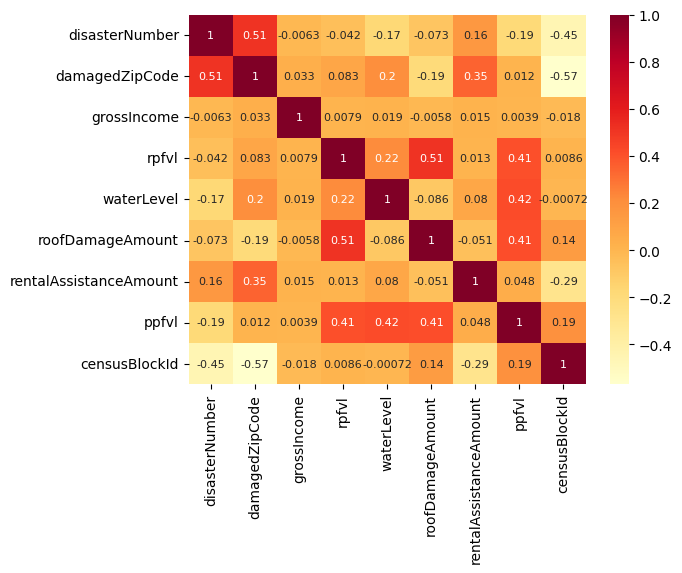

In [ ]:
sns.heatmap(city_cleaned[numerical_col].corr(), annot=True, cmap='YlOrRd', annot_kws={"size": 8}) # correlation map

### We didn't see any correlation and linearity between all numeric features so let's keep all numeric columns for the model

## Fill out missing values in numerics columns

In [ ]:
city_cleaned[numerical_col].isna().sum() # here we see all missing values in column, let's plot parameters and see what is the best option to fill out mmissing values

,0
disasterNumber,0
damagedZipCode,0
grossIncome,50165
rpfvl,1402
waterLevel,76
roofDamageAmount,292462
rentalAssistanceAmount,192392
ppfvl,76
censusBlockId,10716


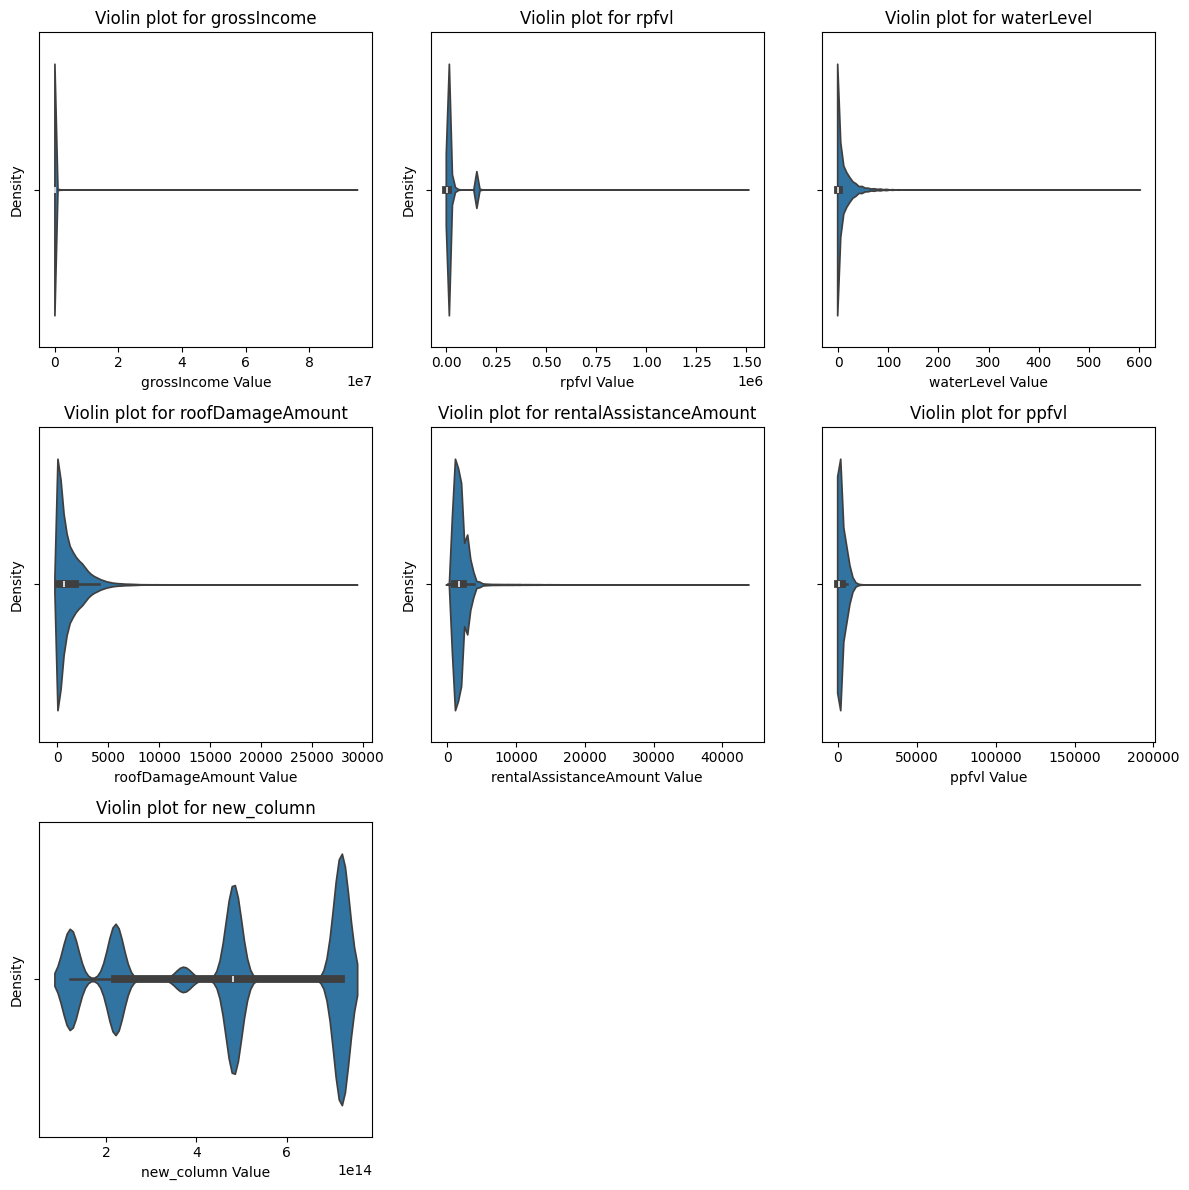

In [ ]:
plt.figure(figsize=(12, 12))

# 1st plot (Violin plot for 'grossIncome')
plt.subplot(3, 3, 1)  # 3 rows, 3 columns, first plot
sns.violinplot(x=city_cleaned['grossIncome'])
plt.title('Violin plot for grossIncome')
plt.xlabel('grossIncome Value')
plt.ylabel('Density')

# 2nd plot (Violin plot for 'rpfvl')
plt.subplot(3, 3, 2)  # 3 rows, 3 columns, second plot
sns.violinplot(x=city_cleaned['rpfvl'])
plt.title('Violin plot for rpfvl')
plt.xlabel('rpfvl Value')
plt.ylabel('Density')

# 3rd plot (Violin plot for 'waterLevel')
plt.subplot(3, 3, 3)  # 3 rows, 3 columns, third plot
sns.violinplot(x=city_cleaned['waterLevel'])
plt.title('Violin plot for waterLevel')
plt.xlabel('waterLevel Value')

# 4th plot (Violin plot for 'roofDamageAmount')
plt.subplot(3, 3, 4)  # 3 rows, 3 columns, fourth plot
sns.violinplot(x=city_cleaned['roofDamageAmount'])
plt.title('Violin plot for roofDamageAmount')
plt.xlabel('roofDamageAmount Value')
plt.ylabel('Density')

# 5th plot (Violin plot for 'rentalAssistanceAmount')
plt.subplot(3, 3, 5)  # 3 rows, 3 columns, fifth plot
sns.violinplot(x=city_cleaned['rentalAssistanceAmount'])
plt.title('Violin plot for rentalAssistanceAmount')
plt.xlabel('rentalAssistanceAmount Value')
plt.ylabel('Density')

# 6th plot (Violin plot for 'ppfvl')
plt.subplot(3, 3, 6)  # 3 rows, 3 columns, sixth plot
sns.violinplot(x=city_cleaned['ppfvl'])
plt.title('Violin plot for ppfvl')
plt.xlabel('ppfvl Value')

# 7th plot (Adding new plot in the 7th position on the third row)
plt.subplot(3, 3, 7)  # 3 rows, 3 columns, seventh plot
sns.violinplot(x=city_cleaned['censusBlockId'])
plt.title('Violin plot for new_column')
plt.xlabel('new_column Value')
plt.ylabel('Density')

plt.tight_layout()

plt.show()

### replace all missing values on mean value, because on the graphics we could see strong density and a lot of outliers

In [ ]:
imputer = SimpleImputer(strategy='mean') # replace all missing values on mean value, because on the graphics we could see strong density and a lot of outliers

city_numeric_data_imputed = imputer.fit_transform(city_cleaned[numerical_col])

city_numeric_data_imputed = pd.DataFrame(city_numeric_data_imputed, columns=city_cleaned[numerical_col].columns)

In [ ]:
city_numeric_data_imputed.isna().sum()

,0
disasterNumber,0
damagedZipCode,0
grossIncome,0
rpfvl,0
waterLevel,0
roofDamageAmount,0
rentalAssistanceAmount,0
ppfvl,0
censusBlockId,0


## Let's work with flags

<Axes: >

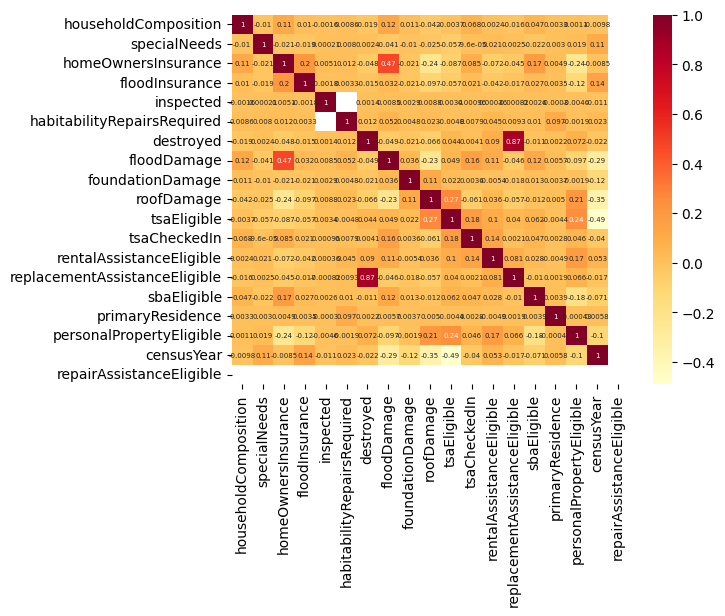

In [ ]:
sns.heatmap(city_cleaned[flags].corr(), annot=True, cmap='YlOrRd', annot_kws={"size": 5}) # correlation map

### Right here we see strong correlation between destroyed and replacementAssistanceEligible and there is just one value in the column repairAssistanceEligible, so let's delete these columns

In [ ]:
flags.remove('replacementAssistanceEligible') # strong correlation that's why that parameter deleted
flags.remove('repairAssistanceEligible') # only one value in column, doesn't contain any information

### Fill out missing values in flags

In [ ]:
city_cleaned[flags].isna().sum() # here we see all missing values in column, let's plot parameters and see what is the best option to fill out mmissing values

,0
householdComposition,0
specialNeeds,0
homeOwnersInsurance,0
floodInsurance,0
inspected,0
habitabilityRepairsRequired,506
destroyed,0
floodDamage,0
foundationDamage,0
roofDamage,0


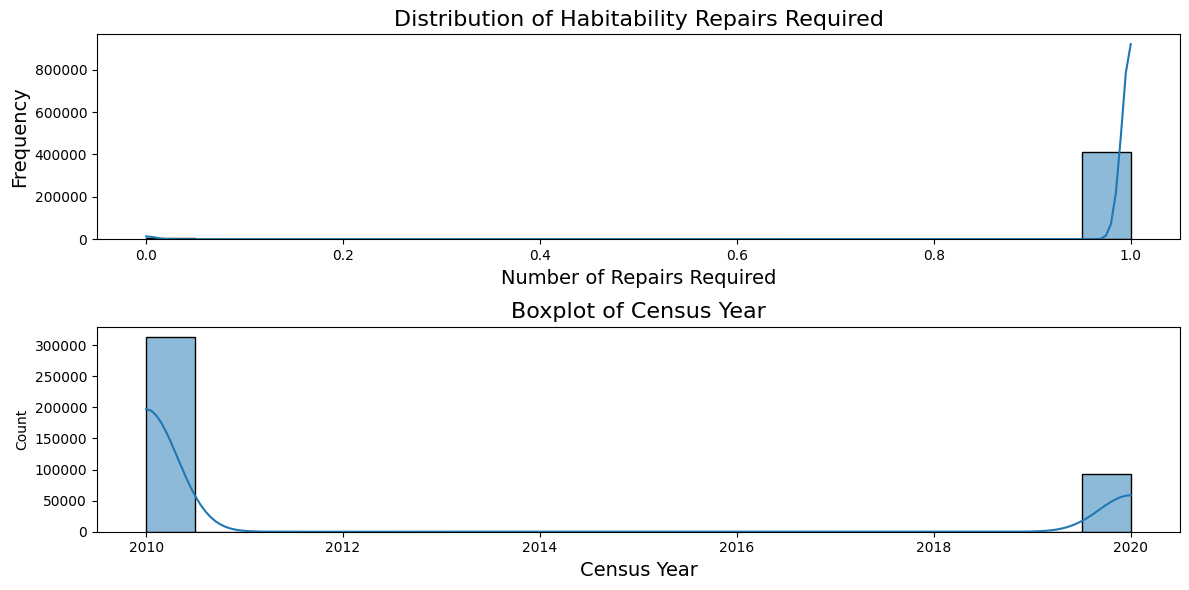

In [ ]:
plt.figure(figsize=(12, 6))

# 1st plot: Histogram
plt.subplot(2, 1, 1)  # 2 rows, 1 column, 1st plot
sns.histplot(city_cleaned['habitabilityRepairsRequired'], kde=True)  # kde=True adds the density curve
plt.title('Distribution of Habitability Repairs Required', fontsize=16)
plt.xlabel('Number of Repairs Required', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# 2nd plot: Boxplot (for censusYear)
plt.subplot(2, 1, 2)  # 2 rows, 1 column, 2nd plot
sns.histplot(city_cleaned['censusYear'], kde = True)
plt.title('Boxplot of Census Year', fontsize=16)  # Update the title to reflect the correct variable
plt.xlabel('Census Year', fontsize=14)  # Update the x-axis label to match the variable

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plots
plt.show()

### replace all missing values with mode, because we can see the majority of each value related to one category

In [ ]:
imputer = SimpleImputer(strategy='most_frequent') # replace all missing values with mode, because we can see the majority of each value related to one category

city_flags_data_imputed = imputer.fit_transform(city_cleaned[flags])

city_flags_data_imputed = pd.DataFrame(city_flags_data_imputed, columns=city_cleaned[flags].columns)

In [ ]:
city_flags_data_imputed.isna().sum()

,0
householdComposition,0
specialNeeds,0
homeOwnersInsurance,0
floodInsurance,0
inspected,0
habitabilityRepairsRequired,0
destroyed,0
floodDamage,0
foundationDamage,0
roofDamage,0


## Transform categorical data

In [ ]:
categorical_col.remove('damagedCity') # delete this column, because it's better to use labelencoder according to a lot of categories

In [ ]:
encoder = OneHotEncoder(sparse_output=False) # use one hot encoder for other 3 columnns

categ = encoder.fit_transform(city_cleaned[categorical_col])

column_names = encoder.get_feature_names_out(input_features=city_cleaned[categorical_col].columns)

categ_city = pd.DataFrame(categ, columns=column_names)

In [ ]:
le = LabelEncoder() # use labelencoder of damagedCity

city_cleaned['damagedCity'] = le.fit_transform(city_cleaned['damagedCity'])

<ipython-input-17-ecedcda8e604>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_cleaned['damagedCity'] = le.fit_transform(city_cleaned['damagedCity'])


## Create final dataset


In [ ]:
city_flags_data_imputed.info() # final data with flag columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 417745 entries, 0 to 417744
Data columns (total 17 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   householdComposition         417745 non-null  float64
 1   specialNeeds                 417745 non-null  float64
 2   homeOwnersInsurance          417745 non-null  float64
 3   floodInsurance               417745 non-null  float64
 4   inspected                    417745 non-null  float64
 5   habitabilityRepairsRequired  417745 non-null  float64
 6   destroyed                    417745 non-null  float64
 7   floodDamage                  417745 non-null  float64
 8   foundationDamage             417745 non-null  float64
 9   roofDamage                   417745 non-null  float64
 10  tsaEligible                  417745 non-null  float64
 11  tsaCheckedIn                 417745 non-null  float64
 12  rentalAssistanceEligible     417745 non-null  float64
 13 

In [ ]:
city_numeric_data_imputed.info() # final data with numeric columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 417745 entries, 0 to 417744
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   disasterNumber          417745 non-null  float64
 1   damagedZipCode          417745 non-null  float64
 2   grossIncome             417745 non-null  float64
 3   rpfvl                   417745 non-null  float64
 4   waterLevel              417745 non-null  float64
 5   roofDamageAmount        417745 non-null  float64
 6   rentalAssistanceAmount  417745 non-null  float64
 7   ppfvl                   417745 non-null  float64
 8   censusBlockId           417745 non-null  float64
dtypes: float64(9)
memory usage: 28.7 MB


In [ ]:
categ_city.info() # final data with categorical columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 417745 entries, 0 to 417744
Data columns (total 18 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   damagedStateAbbreviation_FL             417745 non-null  float64
 1   damagedStateAbbreviation_LA             417745 non-null  float64
 2   damagedStateAbbreviation_NC             417745 non-null  float64
 3   damagedStateAbbreviation_PR             417745 non-null  float64
 4   damagedStateAbbreviation_TX             417745 non-null  float64
 5   residenceType_Apartment                 417745 non-null  float64
 6   residenceType_Assisted Living Facility  417745 non-null  float64
 7   residenceType_Boat                      417745 non-null  float64
 8   residenceType_Condo                     417745 non-null  float64
 9   residenceType_Correctional Facility     417745 non-null  float64
 10  residenceType_House/Duplex              4177

In [ ]:
city_cleaned['damagedCity'].info() # # final data with categorical column

<class 'pandas.core.series.Series'>
RangeIndex: 417745 entries, 0 to 417744
Series name: damagedCity
Non-Null Count   Dtype
--------------   -----
417745 non-null  int64
dtypes: int64(1)
memory usage: 3.2 MB


In [ ]:
df = pd.concat([city_flags_data_imputed, city_numeric_data_imputed, categ_city, city_cleaned.damagedCity, city_cleaned.repairAmount], axis=1) # connect all dataset to the final dataset

In [ ]:
df.shape # final number of features is 45

(417745, 46)

In [ ]:
print(f' Number of rows: {df.shape[0]}')
print(f' Number of columns: {df.shape[1]}')

 Number of rows: 417745
 Number of columns: 46


# Train and Evaluate the model

In [ ]:
X = df.drop('repairAmount', axis = 1) # take features
y = df.repairAmount # take target variable

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42) # divide on train and test data

In [ ]:
print(f' Number of rows: {X_train.shape[0]}')
print(f' Number of columns: {X_train.shape[1]}')

 Number of rows: 313308
 Number of columns: 45


In [ ]:
print(f' Number of rows: {X_test.shape[0]}')
print(f' Number of columns: {X_test.shape[1]}')

 Number of rows: 104437
 Number of columns: 45


## LinearRegresion

In [ ]:
lr = LinearRegression(fit_intercept=True) # create lin reg

lr.fit(X_train, y_train) # train the model

print(f'Weights of the model: {lr.coef_}')

print(f'Intercept of the model: {lr.intercept_}')

Weights of the model: [-1.56677058e+02 -4.45392691e+02 -6.85357097e+02 -3.81972917e+03
 -1.60709283e+02 -9.30260828e+02 -2.92537389e+04  1.35343684e+03
  5.48988280e+02  2.07459062e+03  6.40889175e+02 -3.78516260e+02
 -1.28063429e+02  2.90863743e+03  7.32909037e+01  1.07498173e+03
 -1.46315422e+02  4.42503055e+00  4.99864172e-02  7.19700231e-05
  2.89623686e-01  5.33380278e+01  1.14936337e+00  2.18941226e-01
  6.72735769e-01 -7.43632959e-12 -1.00785547e+03  7.16509950e+02
 -1.22074782e+03  1.17185405e+03  3.40239297e+02  1.80035788e+03
  3.09312894e+02 -5.87943495e+03 -2.56892449e+03 -3.43623463e+02
  1.43229239e+03  4.24498967e+02 -4.63555139e+02  6.28939803e+03
 -1.00032212e+03 -6.27669427e+00 -5.41779251e+01  6.04546194e+01
 -9.43145655e-03]
Intercept of the model: 275233.2140828247


In [ ]:
print(f'RMSE on train data: {root_mean_squared_error(y_train, lr.predict(X_train))}')

print(f'RMSE on test data: {root_mean_squared_error(y_test, lr.predict(X_test))}')

RMSE on train data: 4366.768708524898
RMSE on test data: 4295.761810183244


In [ ]:
print(f'R2_score on train data: {round(r2_score(y_train, lr.predict(X_train)) * 100, 2)}')

print(f'R2_score on test data: {round(r2_score(y_test, lr.predict(X_test)) * 100, 2)}')

R2_score on train data: 57.22
R2_score on test data: 58.73


### According to r2_score and RMSE we can see poor model generelazation on train and test data, also we have underfitting according to R2_score and RMSE

## Feature Importance for Linear Regression

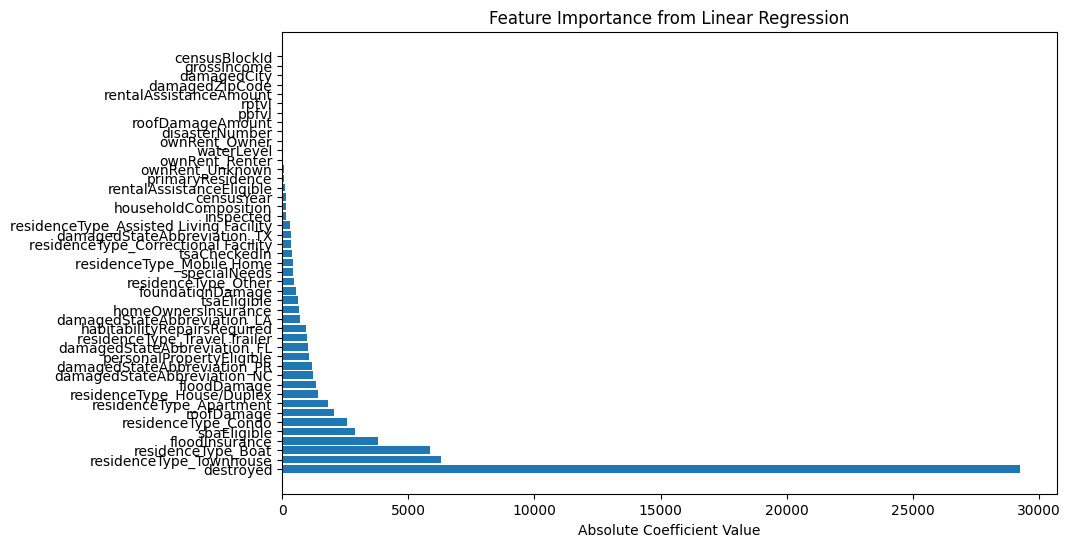

In [ ]:
coefficients = lr.coef_

feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,  # Feature names
    'Coefficient': coefficients  # Coefficients of each feature
})

# Sort the DataFrame by absolute coefficient values to rank the features
feature_importance_df['Absolute Coefficient'] = feature_importance_df['Coefficient'].abs()
feature_importance_df = feature_importance_df.sort_values(by='Absolute Coefficient', ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Absolute Coefficient'])
plt.xlabel('Absolute Coefficient Value')
plt.title('Feature Importance from Linear Regression')
plt.show()

### It could be seen that the most important feature in LinearRegression is destroyed(Is structure permanently uninhabitable)

## L1 - Lasso Regression

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.764e+12, tolerance: 1.396e+09
  model = cd_fast.enet_coordinate_descent(


Best alpha: 0.1
Root Mean Squared Error on test set: 4131.357777237123


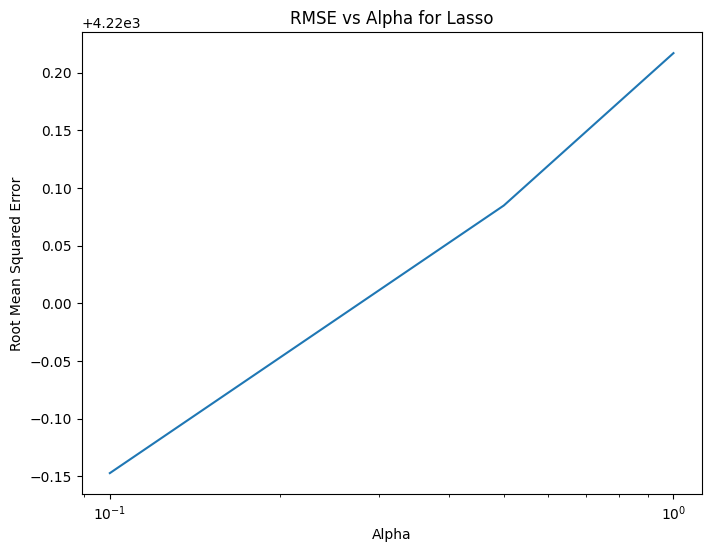

In [ ]:
lasso = Lasso()

# Parameter to find best alpha for the lasso
param_grid = {'alpha': [0.1, 0.5, 1]}

# Grid Search with cross-validation
grid_search = GridSearchCV(lasso, param_grid, cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# best alpha parameter
best_alpha = grid_search.best_params_['alpha']
print(f"Best alpha: {best_alpha}")

# Evaluate the model using the best alpha
lasso_best = grid_search.best_estimator_
y_pred = lasso_best.predict(X_test)

# Compute the root mean squared error on the test set
rmse = root_mean_squared_error(y_test, y_pred)
print(f"Root Mean Squared Error on test set: {rmse}")

# Plot the change in RMSE with different alphas
alphas = [0.1, 0.5, 1]
scores = -grid_search.cv_results_['mean_test_score']

plt.figure(figsize=(8, 6))
plt.semilogx(alphas, scores)
plt.xlabel('Alpha')
plt.ylabel('Root Mean Squared Error')
plt.title('RMSE vs Alpha for Lasso')
plt.show()

### So best alpha hyperparameter according to cross validaition on train data and measure performance on test data is alpha=0.1

In [ ]:
lasso = Lasso(alpha=0.1) # create lasso with alpha = 0.1

lasso.fit(X_train, y_train) # train the model

print(f'Weights of the model: {lasso.coef_}')

print(f'Intercept of the model: {lasso.intercept_}')

Weights of the model: [-1.43464157e+02 -1.17822466e+02  2.89413882e+02 -3.27936693e+03
  1.09441430e+03 -1.95536740e+02 -3.24896200e+04  9.81363553e+02
  3.95831978e+02  8.27858306e+02  8.27722523e+02  2.72623186e+01
  7.24446091e+02  9.00370466e+02 -1.81633078e+02  2.77707627e+02
 -8.45373189e+01 -1.16175456e-01  2.02008343e-02  4.58795693e-05
  3.01364406e-01  3.81602536e+01  1.05684090e+00  1.95429298e-01
  7.08011024e-01 -3.25240045e-13  1.87710981e+02  2.53654336e+03
 -4.64220882e+02 -1.58422764e+03  2.46699252e+02  1.03559868e+01
 -0.00000000e+00 -6.66272222e+02 -7.39189963e+02  0.00000000e+00
  5.75579553e+02  4.48548909e+02 -3.42820516e+02  4.29425250e+02
 -5.74317430e+02 -1.01876152e+02  0.00000000e+00  1.46340922e+03
 -2.77793294e-02]
Intercept of the model: 168632.65406436965


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.764e+12, tolerance: 1.396e+09
  model = cd_fast.enet_coordinate_descent(


In [ ]:
print(f'RMSE on train data: {root_mean_squared_error(y_train, lasso.predict(X_train))}')

print(f'RMSE on test data: {root_mean_squared_error(y_test, lasso.predict(X_test))}')

RMSE on train data: 4198.977334892317
RMSE on test data: 4131.357777237123


In [ ]:
print(f'R2_score on train data: {round(r2_score(y_train, lasso.predict(X_train)) * 100, 2)}')

print(f'R2_score on test data: {round(r2_score(y_test, lasso.predict(X_test)) * 100, 2)}')

R2_score on train data: 60.44
R2_score on test data: 61.82


### We can see that R2_score and RMSE become better in comparisson with LinearRegression, but it still not a good relust. Also we have underfitting.

## Feature importance of Lasso

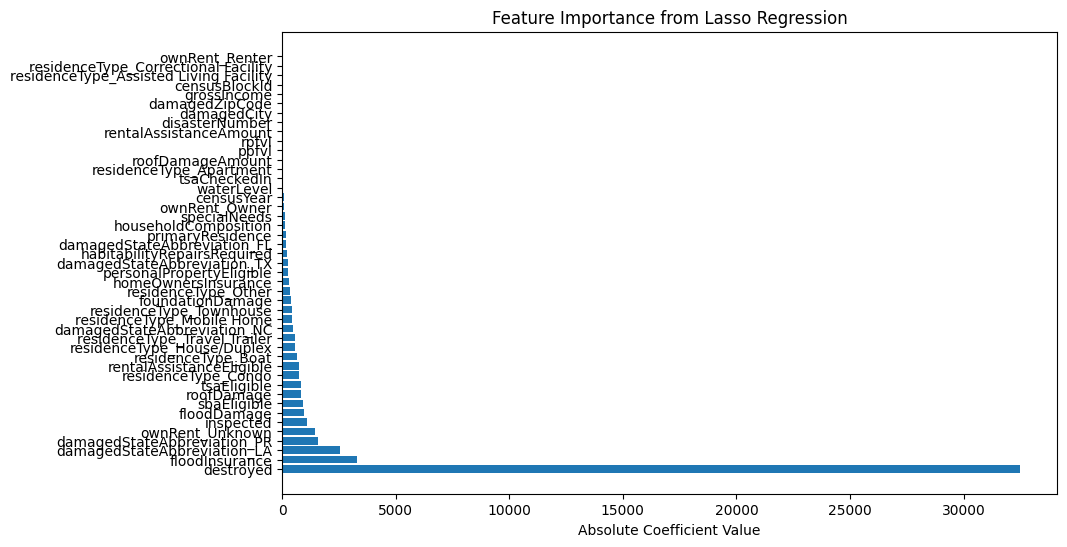

In [ ]:
coefficients = lasso.coef_

feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,  # Feature names
    'Coefficient': coefficients  # Coefficients of each feature
})

# Sort the DataFrame by absolute coefficient values to rank the features
feature_importance_df['Absolute Coefficient'] = feature_importance_df['Coefficient'].abs()
feature_importance_df = feature_importance_df.sort_values(by='Absolute Coefficient', ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Absolute Coefficient'])
plt.xlabel('Absolute Coefficient Value')
plt.title('Feature Importance from Lasso Regression')
plt.show()

### It could be seen that the most important feature in Lasso is destroyed(Is structure permanently uninhabitable)

## It could be seen that linear Models don't perform well, so let's try non-linear Models

## Tree - Decision Tree Regressor

Best parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}
Root Mean Squared Error on test set: 2390.912227268808


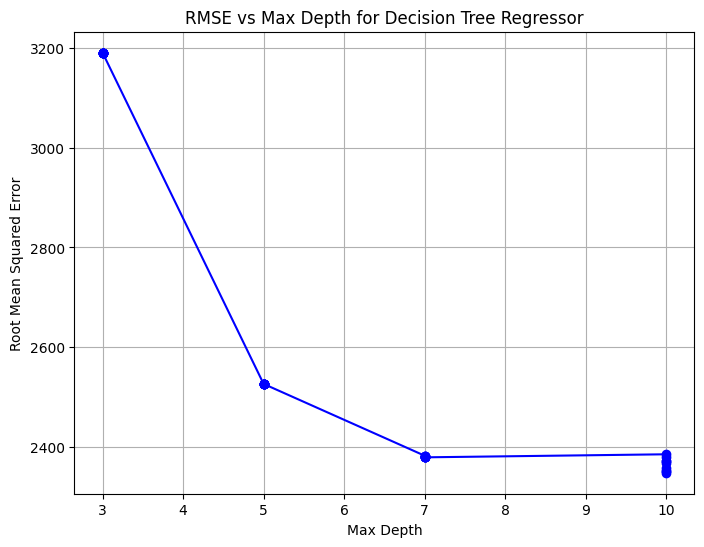

In [ ]:
dt_regressor = DecisionTreeRegressor()

# Parameter grid to find the best max_depth, min_samples_split, and min_samples_leaf
param_grid = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Grid Search with cross-validation
grid_search = GridSearchCV(dt_regressor, param_grid, cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

# Evaluate the model using the best parameters
dt_best = grid_search.best_estimator_
y_pred = dt_best.predict(X_test)

# Compute the root mean squared error on the test set
rmse = root_mean_squared_error(y_test, y_pred)
print(f"Root Mean Squared Error on test set: {rmse}")

# Plot the change in RMSE with different parameters (focused on max_depth)
# Extracting mean RMSE for different max_depth values
mean_scores = -grid_search.cv_results_['mean_test_score']
# Find indices for max_depth in the grid search
depth_indices = [i for i, params in enumerate(grid_search.cv_results_['params']) if 'max_depth' in params]
depth_scores = mean_scores[depth_indices]

# Plot the RMSE for different max_depth values
depth_values = [grid_search.cv_results_['params'][i]['max_depth'] for i in depth_indices]
plt.figure(figsize=(8, 6))
plt.plot(depth_values, depth_scores, marker='o', linestyle='-', color='b')
plt.xlabel('Max Depth')
plt.ylabel('Root Mean Squared Error')
plt.title('RMSE vs Max Depth for Decision Tree Regressor')
plt.grid(True)
plt.show()

### So best max_depth, min_samples_split and min_samples_leaf hyperparameters according to cross validaition on train data and measure performance on test data is max_depth = 10, min_samples_split=10, min_samples_leaf=4


In [ ]:
dt_regressor = DecisionTreeRegressor(max_depth=10, min_samples_split=10, min_samples_leaf=4) # create lasso with alpha = 0.1

dt_regressor.fit(X_train, y_train) # train the model

DecisionTreeRegressor(max_depth=10, min_samples_leaf=4, min_samples_split=10)

In [ ]:
print(f'RMSE on train data: {root_mean_squared_error(y_train, dt_regressor.predict(X_train))}')

print(f'RMSE on test data: {root_mean_squared_error(y_test, dt_regressor.predict(X_test))}')

RMSE on train data: 2179.3430650470086
RMSE on test data: 2391.306557257632


In [ ]:
print(f'R2_score on train data: {round(r2_score(y_train, dt_regressor.predict(X_train)) * 100, 2)}%')

print(f'R2_score on test data: {round(r2_score(y_test, dt_regressor.predict(X_test)) * 100, 2)}%')

R2_score on train data: 89.34%
R2_score on test data: 87.21%


### We can see that R2_score and RMSE become much better in comparisson with Linear models. Right here we can see good model generelazation, but right now we have overfitting.

## Feature importance of Decision Tree Regressor

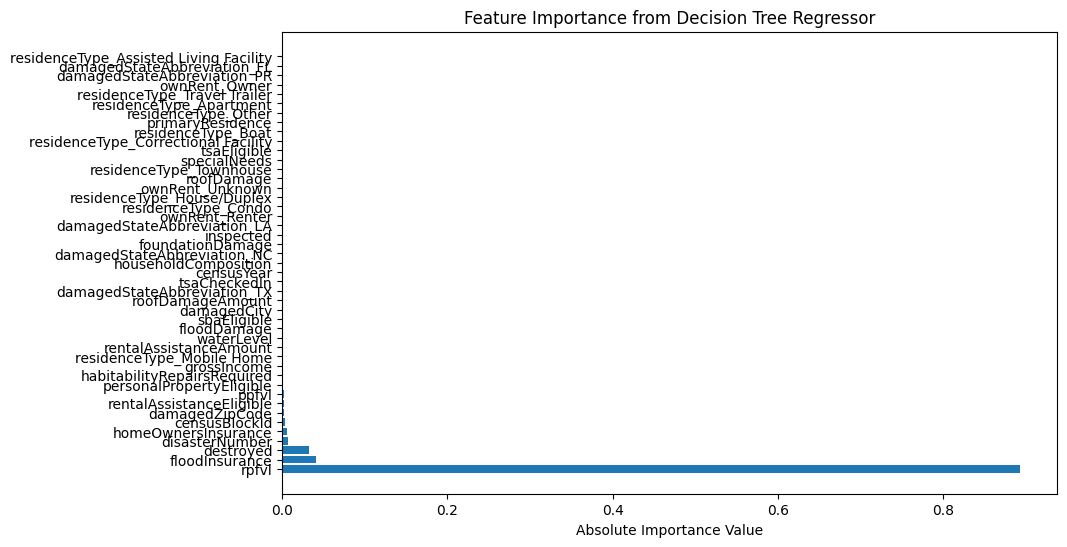

In [ ]:
# Get the feature importance from the decision tree regressor
importance = dt_regressor.feature_importances_

# Create a DataFrame for easy display
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,  # Feature names
    'Importance': importance     # Importance of each feature
})

# Add a column for the absolute values of the feature importances
feature_importance_df['Absolute Importance'] = feature_importance_df['Importance'].abs()

# Sort by absolute importance values
feature_importance_df = feature_importance_df.sort_values(by='Absolute Importance', ascending=False)

# Visualization
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Absolute Importance'])
plt.xlabel('Absolute Importance Value')
plt.title('Feature Importance from Decision Tree Regressor')
plt.show()

### It could be seen that the most important feature in Decision Tree Regressor is rpfvl(Real property damage amount observed by FEMA)

## Let's try more advanced techniques like random forest and boostings

## Radnom Forest - Random Forest Regressor

Best parameters: {'max_depth': 10, 'n_estimators': 20}


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Root Mean Squared Error on test set: 2337.0551489189365


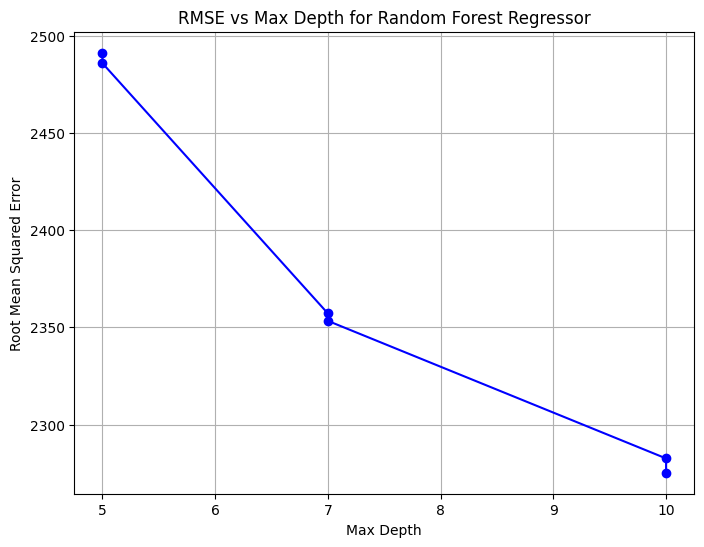

In [ ]:
rf_regressor = RandomForestRegressor()

# Parameter grid to find the best n_estimators, max_depth, and min_samples_split
param_grid = {
    'n_estimators': [10, 20],  # Number of trees in the forest
    'max_depth': [5, 7, 10],  # Maximum depth of each tree
}

# Grid Search with cross-validation
grid_search = GridSearchCV(rf_regressor, param_grid, cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters from GridSearchCV
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

# Evaluate the model using the best parameters
rf_best = grid_search.best_estimator_
y_pred = rf_best.predict(X_test)

# Compute the root mean squared error on the test set
rmse = mean_squared_error(y_test, y_pred, squared=False)  # RMSE (Root Mean Squared Error)
print(f"Root Mean Squared Error on test set: {rmse}")

# Plot the change in RMSE with different parameters (focused on max_depth)
# Extracting mean RMSE for different max_depth values
mean_scores = -grid_search.cv_results_['mean_test_score']

# Find indices for max_depth in the grid search
depth_indices = [i for i, params in enumerate(grid_search.cv_results_['params']) if 'max_depth' in params]
depth_scores = mean_scores[depth_indices]

# Plot the RMSE for different max_depth values
depth_values = [grid_search.cv_results_['params'][i]['max_depth'] for i in depth_indices]
plt.figure(figsize=(8, 6))
plt.plot(depth_values, depth_scores, marker='o', linestyle='-', color='b')
plt.xlabel('Max Depth')
plt.ylabel('Root Mean Squared Error')
plt.title('RMSE vs Max Depth for Random Forest Regressor')
plt.grid(True)
plt.show()

### So best max_depth, n_estimators hyperparameters according to cross validaition on train data and measure performance on test data is max_depth = 10, n_estimators = 20

In [ ]:
rf_regressor = RandomForestRegressor(max_depth = 10, n_estimators=20)

rf_regressor.fit(X_train, y_train) # train the model

RandomForestRegressor(max_depth=10, n_estimators=20)

In [ ]:
print(f'RMSE on train data: {root_mean_squared_error(y_train, rf_regressor.predict(X_train))}')

print(f'RMSE on test data: {root_mean_squared_error(y_test, rf_regressor.predict(X_test))}')

RMSE on train data: 2104.2952271798417
RMSE on test data: 2335.4637550149378


In [ ]:
print(f'R2_score on train data: {round(r2_score(y_train, rf_regressor.predict(X_train)) * 100, 2)}%')

print(f'R2_score on test data: {round(r2_score(y_test, rf_regressor.predict(X_test)) * 100, 2)}%')

R2_score on train data: 90.07%
R2_score on test data: 87.8%


### We can see that R2_score and RMSE is on the same level as in Decision Tree Regressor. Random Forest Regressor model has good generalazation on train and test data, also we can see overfitting.

## Feature importance of Random Forest Regressor

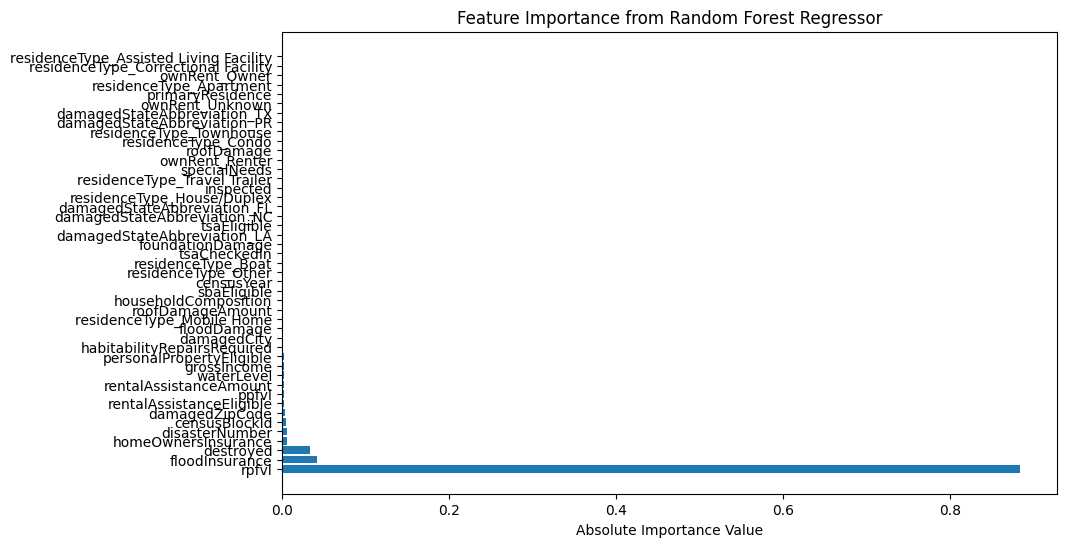

In [ ]:
importance = rf_regressor.feature_importances_

# Create a DataFrame for easy display
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,  # Feature names
    'Importance': importance     # Importance of each feature
})

# Add a column for the absolute values of the feature importances
feature_importance_df['Absolute Importance'] = feature_importance_df['Importance'].abs()

# Sort by absolute importance values
feature_importance_df = feature_importance_df.sort_values(by='Absolute Importance', ascending=False)

# Visualization
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Absolute Importance'])
plt.xlabel('Absolute Importance Value')
plt.title('Feature Importance from Random Forest Regressor')
plt.show()

### It could be seen that the most important feature in Random Forest regressor Regressor is rpfvl(Real property damage amount observed by FEMA)

### Boosting - XGBoost Regressor

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best parameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100}


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Root Mean Squared Error on test set: 2284.551286709565


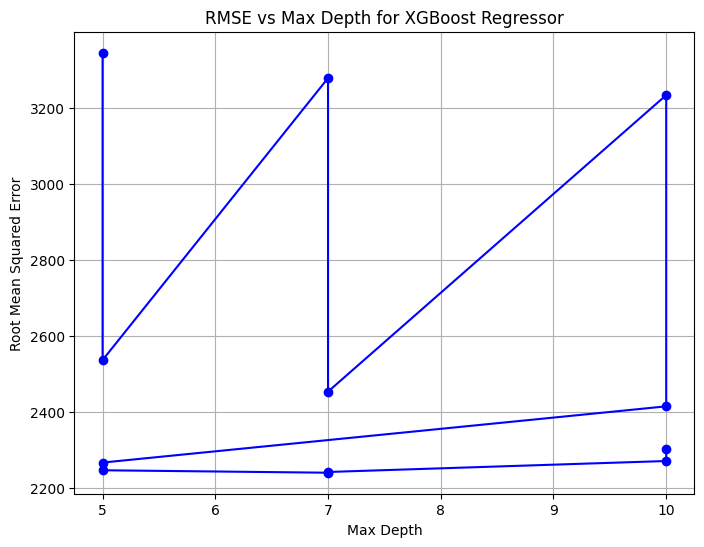

In [ ]:
xgb_regressor = XGBRegressor()

# Parameter grid to find the best n_estimators, max_depth, and learning_rate
param_grid = {
    'n_estimators': [100, 200],  # Number of boosting rounds
    'max_depth': [5, 7, 10],      # Maximum depth of each tree
    'learning_rate': [0.01, 0.1], # Learning rate for boosting
}

# Grid Search with cross-validation
grid_search = GridSearchCV(xgb_regressor, param_grid, cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters from GridSearchCV
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

# Evaluate the model using the best parameters
xgb_best = grid_search.best_estimator_
y_pred = xgb_best.predict(X_test)

# Compute the root mean squared error on the test set
rmse = mean_squared_error(y_test, y_pred, squared=False)  # RMSE (Root Mean Squared Error)
print(f"Root Mean Squared Error on test set: {rmse}")

# Plot the change in RMSE with different parameters (focused on max_depth)
# Extracting mean RMSE for different max_depth values
mean_scores = -grid_search.cv_results_['mean_test_score']

# Find indices for max_depth in the grid search
depth_indices = [i for i, params in enumerate(grid_search.cv_results_['params']) if 'max_depth' in params]
depth_scores = mean_scores[depth_indices]

# Plot the RMSE for different max_depth values
depth_values = [grid_search.cv_results_['params'][i]['max_depth'] for i in depth_indices]
plt.figure(figsize=(8, 6))
plt.plot(depth_values, depth_scores, marker='o', linestyle='-', color='b')
plt.xlabel('Max Depth')
plt.ylabel('Root Mean Squared Error')
plt.title('RMSE vs Max Depth for XGBoost Regressor')
plt.grid(True)
plt.show()

### So best max_depth, n_estimators and learning_rate hyperparameters according to cross validaition on train data and measure performance on test data is max_depth = 7 , n_estimators = 100, learning_rate = 0.1

In [ ]:
xgb_regressor = XGBRegressor(max_depth=7, n_estimators=100, learning_rate=0.1)

xgb_regressor.fit(X_train, y_train) # train the model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
print(f'RMSE on train data: {root_mean_squared_error(y_train, xgb_regressor.predict(X_train))}')

print(f'RMSE on test data: {root_mean_squared_error(y_test, xgb_regressor.predict(X_test))}')

RMSE on train data: 2047.2267478121923
RMSE on test data: 2284.551286709565


In [ ]:
print(f'R2_score on train data: {round(r2_score(y_train, xgb_regressor.predict(X_train)) * 100, 2)}%')

print(f'R2_score on test data: {round(r2_score(y_test, xgb_regressor.predict(X_test)) * 100, 2)}%')

R2_score on train data: 90.6%
R2_score on test data: 88.33%


### We can see that R2_score and RMSE on train data is on the same level as in Decision Tree Regressor and Random Forest Regressor, but test score become better on 1%. XGBoost Regressor model has good generalazation on train and test data, also we can see overfitting.

## Feature importance of Random Forest Regressor

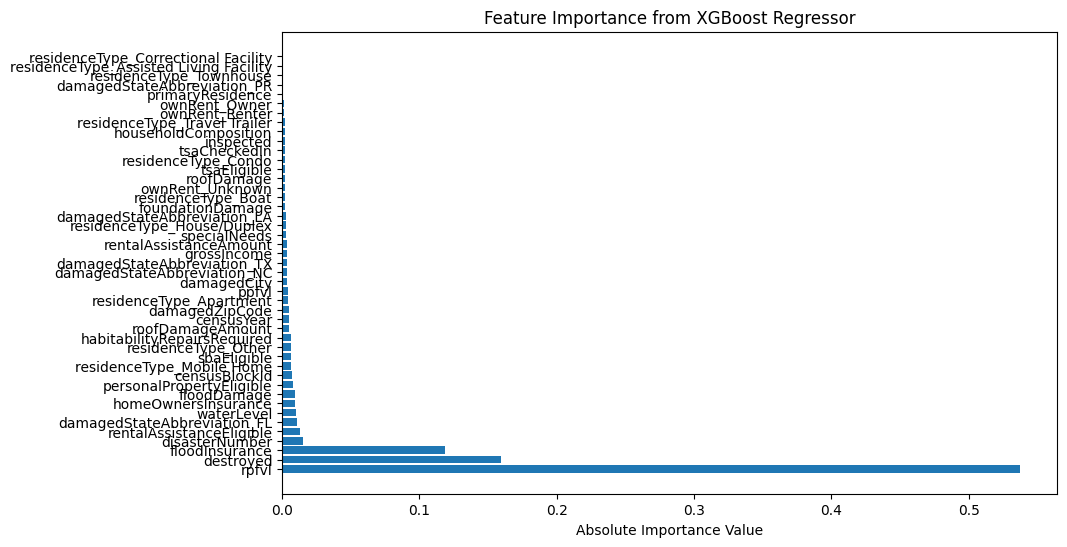

In [ ]:
importance = xgb_regressor.feature_importances_

# Create a DataFrame for easy display
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,  # Feature names
    'Importance': importance     # Importance of each feature
})

# Add a column for the absolute values of the feature importances
feature_importance_df['Absolute Importance'] = feature_importance_df['Importance'].abs()

# Sort by absolute importance values
feature_importance_df = feature_importance_df.sort_values(by='Absolute Importance', ascending=False)

# Visualization
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Absolute Importance'])
plt.xlabel('Absolute Importance Value')
plt.title('Feature Importance from XGBoost Regressor')
plt.show()

### It could be seen that the most important feature in Random Forest regressor Regressor is rpfvl(Real property damage amount observed by FEMA)

## Let's try other technique like Density Neural Network

In [ ]:
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the same scaler (to avoid data leakage)
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_train_tensor = torch.FloatTensor(X_train_scaled)
X_test_tensor = torch.FloatTensor(X_test_scaled)
y_train_tensor = torch.FloatTensor(y_train.values)
y_test_tensor = torch.FloatTensor(y_test.values)

In [ ]:
y_train_tensor = y_train_tensor.view(-1, 1)
y_test_tensor = y_test_tensor.view(-1, 1)

In [ ]:
class SimpleNN(nn.Module):
  def __init__(self):
    super(SimpleNN, self).__init__()
    self.fc1 = nn.Linear(45, 40)
    self.relu = nn.ReLU()
    self.fc2 = nn.Linear(40, 30)
    self.relu = nn.ReLU()
    self.fc3 = nn.Linear(30, 20)
    self.relu = nn.ReLU()
    self.fc4 = nn.Linear(20, 10)
    self.relu = nn.ReLU()
    self.fc5 = nn.Linear(10, 1)


  def forward(self, x):
    x = self.fc1(x)
    x = self.relu(x)
    x = self.fc2(x)
    x = self.relu(x)
    x = self.fc3(x)
    x = self.relu(x)
    x = self.fc4(x)
    x = self.relu(x)
    x = self.fc5(x)
    return x

model = SimpleNN()

In [ ]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)

In [ ]:
num_epochs = 3000

for epoch in range(num_epochs):
  model.train()
  optimizer.zero_grad()
  outputs = model(X_train_tensor)
  loss = criterion(outputs, y_train_tensor)
  loss.backward()
  optimizer.step()

  if (epoch + 1) % 100 == 0:
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [100/3000], Loss: 72893336.0000
Epoch [200/3000], Loss: 25546522.0000
Epoch [300/3000], Loss: 20674486.0000
Epoch [400/3000], Loss: 19005534.0000
Epoch [500/3000], Loss: 17820560.0000
Epoch [600/3000], Loss: 16727416.0000
Epoch [700/3000], Loss: 15624811.0000
Epoch [800/3000], Loss: 14445653.0000
Epoch [900/3000], Loss: 13233251.0000
Epoch [1000/3000], Loss: 12220774.0000
Epoch [1100/3000], Loss: 11637409.0000
Epoch [1200/3000], Loss: 11337556.0000
Epoch [1300/3000], Loss: 11167677.0000
Epoch [1400/3000], Loss: 11041635.0000
Epoch [1500/3000], Loss: 10949909.0000
Epoch [1600/3000], Loss: 10877726.0000
Epoch [1700/3000], Loss: 10821615.0000
Epoch [1800/3000], Loss: 10769146.0000
Epoch [1900/3000], Loss: 10723200.0000
Epoch [2000/3000], Loss: 10684226.0000
Epoch [2100/3000], Loss: 10652773.0000
Epoch [2200/3000], Loss: 10624356.0000
Epoch [2300/3000], Loss: 10603291.0000
Epoch [2400/3000], Loss: 10584910.0000
Epoch [2500/3000], Loss: 10568934.0000
Epoch [2600/3000], Loss: 10554398.

In [ ]:
model.eval()
with torch.no_grad():
    train_outputs = model(X_train_tensor)
    r2 = r2_score(y_train, train_outputs)

    print(f"R² Score on train set: {r2:.4f}")

R² Score on train set: 0.7644


In [ ]:
model.eval()
with torch.no_grad():
    test_outputs = model(X_test_tensor)
    r2 = r2_score(y_test, test_outputs)

    print(f"R² Score on test set: {r2:.4f}")

R² Score on test set: 0.8212


### It could be seen good results on R2_score and good model generelazation on both datasets